<a href="https://colab.research.google.com/github/Ravikool/https-github.com-Ravikool-Flight-Dataset-of-NYC/blob/master/LoanRepayment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Downloading all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [0]:
data = pd.read_csv("Loan payments data.csv")

In [21]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [0]:
import pandas_profiling 

In [22]:
pandas_profiling.ProfileReport(data)

Number of variables,11
Number of observations,500
Total Missing (%),7.3%
Total size in memory,43.0 KiB
Average record size in memory,88.2 B
Numeric,4
Categorical,6
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [14]:
print(loanr.size)

loanr Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB
None
loanr Describe

         Principal       terms  past_due_days         age
count   500.000000  500.000000      200.00000  500.000000
mean    943.200000   22.824000       36.01000   31.116000
std     115.240274    8.000064       29.38088    6.084784
min     300.000000    7.000000        1.00000   18.000000
25%    1000.000000   15.000000        3.00000   27.000000
50%    1000.000000   30.000000     

In [25]:
print('Data Info\n')
print(data.info())

print('Data Describe\n')
print(data.describe())

print('Data Age Describe\n')
print(data.age.describe())

print('Data Age and terms Describe')
print(data[['age','terms']].describe())

print('Data shape\n')
print(data.shape)

print('Data Corr\n')
print(data.corr())

print('Data Corr Age Terms\n')
print(data[['age','terms']].corr())

print('Data Dtypes\n')
print(data.dtypes)

Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB
None
Data Describe

         Principal       terms  past_due_days         age
count   500.000000  500.000000      200.00000  500.000000
mean    943.200000   22.824000       36.01000   31.116000
std     115.240274    8.000064       29.38088    6.084784
min     300.000000    7.000000        1.00000   18.000000
25%    1000.000000   15.000000        3.00000   27.000000
50%    1000.000000   30.000000       

In [26]:
# Renaming some columns to make more sense

print('Data Columns\n')
for col in data.columns:
    print(col)
print('Rename Data Columns\n')
data=data.rename(columns={'Loan_ID':'Loan_Id','loan_status':'Loan_Status','Principal':'Principal',
                          'terms':'Terms','effective_date':'Effective_Date','due_date':'Due_Date',
                          'paid_off_time':'Paid_Of_Time','past_due_days':'Past_Due_Days','age':'Age',
                          'education':'Education','Gender':'Gender'})

Data Columns

Loan_ID
loan_status
Principal
terms
effective_date
due_date
paid_off_time
past_due_days
age
education
Gender
Rename Data Columns



In [31]:
# Organise our loan status columns and loan id columns 

#print('Loan_ID States\n')    
print('Loan_ID missing sum\n')
print(data.Loan_Id.isnull().sum())
#print('Loan_ID unique value\n')
#print(data.Loan_Id.unique())
print('Loan_Id unqiue sum\n')
print(sum(data.Loan_Id.value_counts()))

Loan_ID missing sum

0
Loan_Id unqiue sum

500


In [32]:
print('Loan_Status\n')
print('Loan Status Value Counts\n')

print(data['Loan_Status'].value_counts(dropna=False))
print('Loan_Status missing sum\n')

print(data.Loan_Status.isnull().sum())
print('Loan_ID unqiue value\n')

print(data.Loan_Status.unique())
loan_status_unique=data.Loan_Status.unique().reshape(-1,1)
print(loan_status_unique)

Loan_Status

Loan Status Value Counts

PAIDOFF               300
COLLECTION_PAIDOFF    100
COLLECTION            100
Name: Loan_Status, dtype: int64
Loan_Status missing sum

0
Loan_ID unqiue value

['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']
[['PAIDOFF']
 ['COLLECTION']
 ['COLLECTION_PAIDOFF']]


['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



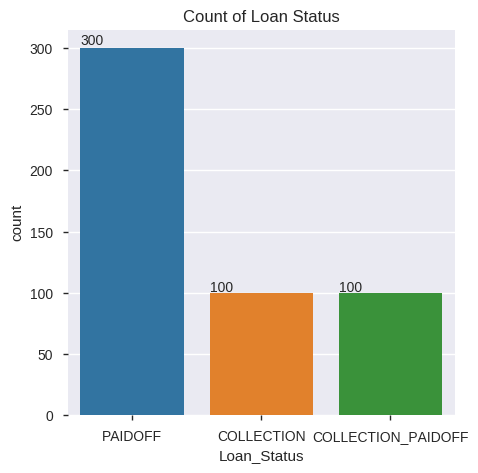

In [63]:
print(data.Loan_Status.unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data.Loan_Status)
ax.set_title("Count of Loan Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



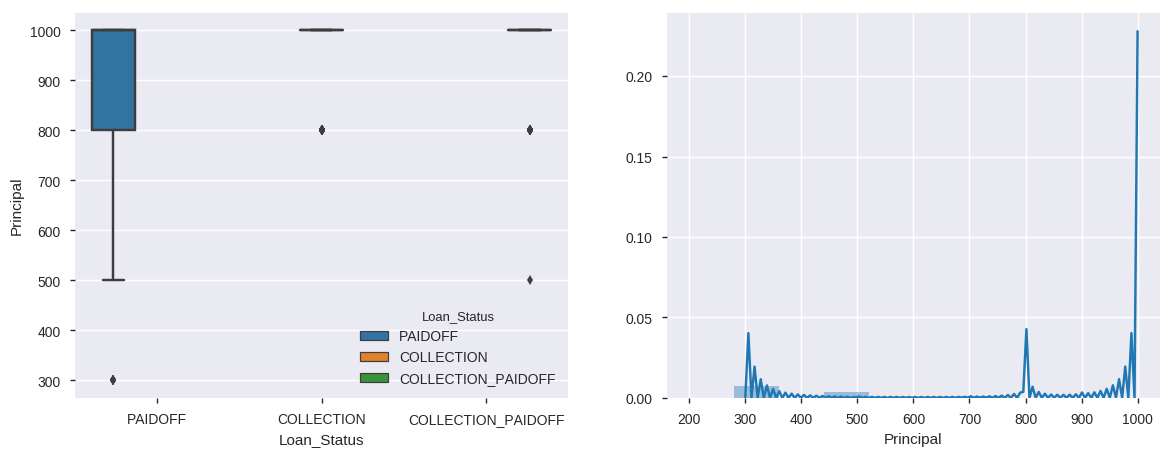

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x='Loan_Status', y='Principal', data=data, hue='Loan_Status', ax=axs[0])
sns.distplot(data.Principal, bins=range(200, 800, 80), ax=axs[1], kde=True)
plt.show();

In [33]:
paidoff_count=0
collection_count=0
collection_paidoff_count=0

print('Loan status with Loan_Id counts\n')
paidoff_count=len(data[data.Loan_Status==loan_status_unique[0][0]].Loan_Id)
collection_count=len(data[data.Loan_Status==loan_status_unique[1][0]].Loan_Id)
collection_paidoff_count=len(data[data.Loan_Status==loan_status_unique[2][0]].Loan_Id)  

Loan status with Loan_Id counts



In [35]:
#print('Pricipal State\n')
print('Data Principal value counts\n')
print(data.Principal.value_counts())

Data Principal value counts

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64


In [36]:
print('Paidoff and principal all of them whatever\n')   
print(data.Principal.isnull().sum())
print(data.groupby('Loan_Status')['Principal'].value_counts()) 
print('Group by every Principal in Data\n')
print(data.groupby('Loan_Status')['Principal'].sum()) 

Paidoff and principal all of them whatever

0
Loan_Status         Principal
COLLECTION          1000          77
                    800           23
COLLECTION_PAIDOFF  1000          80
                    800           19
                    500            1
PAIDOFF             1000         220
                    800           69
                    300            6
                    500            2
                    900            2
                    700            1
Name: Principal, dtype: int64
Group by every Principal in Data

Loan_Status
COLLECTION             95400
COLLECTION_PAIDOFF     95700
PAIDOFF               280500
Name: Principal, dtype: int64


In [37]:
print('Terms is missing value\n')
print(data.Terms.isnull().sum())
print('Terms value unique\n')
print(data.Terms.value_counts())
print('Unique Terms Value\n')
print(data.Terms.unique())

Terms is missing value

0
Terms value unique

30    272
15    207
7      21
Name: Terms, dtype: int64
Unique Terms Value

[30 15  7]


In [38]:
print('Groupby Terms and Principal in Data\n')
print(data.groupby('Terms')['Principal'].value_counts())
print('Group sum every Terms in Data')
print(data.groupby('Terms')['Principal'].sum())

Groupby Terms and Principal in Data

Terms  Principal
7      1000          11
       300            6
       800            2
       500            1
       900            1
15     800          103
       1000         100
       500            2
       700            1
       900            1
30     1000         266
       800            6
Name: Principal, dtype: int64
Group sum every Terms in Data
Terms
7      15800
15    185000
30    270800
Name: Principal, dtype: int64


In [39]:
print('Effective State\n')
print('Effective Date isnull\n')
print(data.Effective_Date.isnull().sum())
print('Effective Value Counts\n')
print(data.Effective_Date.value_counts())
print('Effective group by Terms nad Principal in every Data\n')
print(data.groupby('Effective_Date')[['Terms','Principal']].count())
print('Group sum every Terms and Principal in Data')
print(data.groupby('Effective_Date')[['Terms','Principal']].sum())
print('Group Mean every Terms and Principal in Data')
print(data.groupby('Effective_Date')[['Terms','Principal']].mean())

Effective State

Effective Date isnull

0
Effective Value Counts

9/11/2016    231
9/12/2016    148
9/10/2016     46
9/14/2016     33
9/13/2016     23
9/9/2016      15
9/8/2016       4
Name: Effective_Date, dtype: int64
Effective group by Terms nad Principal in every Data

                Terms  Principal
Effective_Date                  
9/10/2016          46         46
9/11/2016         231        231
9/12/2016         148        148
9/13/2016          23         23
9/14/2016          33         33
9/8/2016            4          4
9/9/2016           15         15
Group sum every Terms and Principal in Data
                Terms  Principal
Effective_Date                  
9/10/2016        1026      43200
9/11/2016        5328     219000
9/12/2016        3335     139400
9/13/2016         441      20900
9/14/2016         840      31400
9/8/2016          105       4000
9/9/2016          337      13700
Group Mean every Terms and Principal in Data
                    Terms    Principal
Effe

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



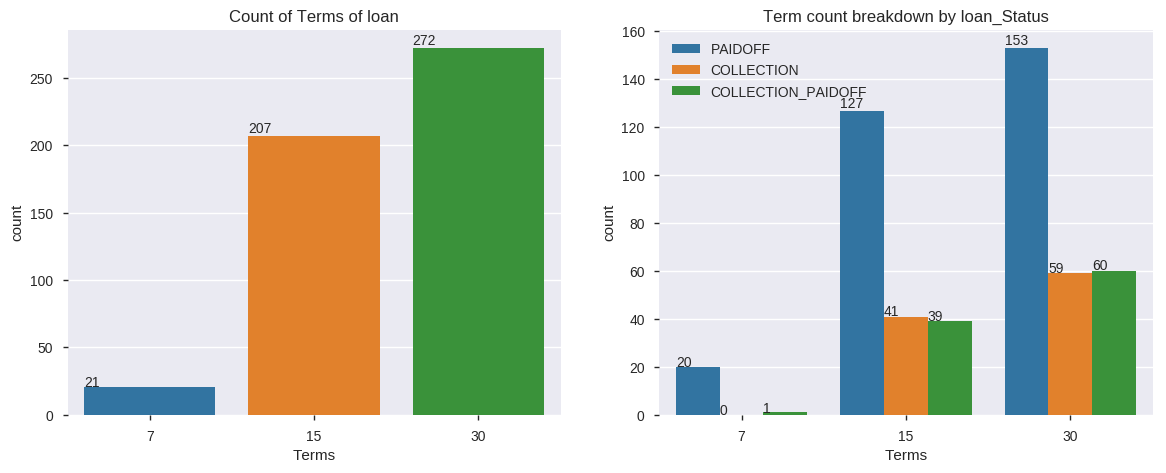

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(data.Terms, ax=axs[0])
axs[0].set_title("Count of Terms of loan")
for p in axs[0].patches:
    axs[0].annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

sns.countplot(x='Terms', hue='Loan_Status', data=data, ax=axs[1])
axs[1].set_title("Term count breakdown by loan_Status")
for t in axs[1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1].annotate(0, (t.get_x(), 0))
    else:
        axs[1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

axs[1].legend(loc='upper left')
plt.show();

In [40]:
print('Age in Data state\n')
print('Data isnull sum\n')

print(data.Age.isnull().sum())
print('Data unique age\n')

print(data.Age.unique())
print('Data value counts age\n')

print(data.Age.value_counts())
print('Age group by Terms nad Principal in every Data\n')

print(data.groupby('Terms')['Age'].value_counts())
print('Group sum every Terms and Principal in Data')
print(data.groupby('Age')[['Terms','Principal']].sum())

Age in Data state

Data isnull sum

0
Data unique age

[45 50 33 27 28 35 29 36 26 39 40 32 43 25 34 31 37 24 21 30 22 44 46 38
 23 20 47 42 19 51 41 18 49]
Data value counts age

26    46
29    42
27    38
30    37
28    32
33    30
35    26
34    25
24    23
31    22
25    20
32    20
38    19
37    19
36    14
39    10
23    10
40     8
22     8
21     7
45     5
46     5
41     5
43     5
44     4
50     4
20     4
42     4
47     3
19     2
51     1
49     1
18     1
Name: Age, dtype: int64
Age group by Terms nad Principal in every Data

Terms  Age
7      29      4
       35      3
       25      2
       26      2
       27      2
       31      2
       34      2
       22      1
       23      1
       32      1
       37      1
15     29     18
       26     17
       30     14
       27     13
       28     12
       24     11
       33     11
       35     11
       25     10
       34     10
       31      8
       32      8
       38      8
       37      7
       39      

In [0]:
data_age=data.Age.value_counts().index
len(data_age)
data_age_list=[]
for age in data_age:
    data_age_list.append(sum(data[data.Age==int(age)].Principal))

In [44]:
#print('Education State\n')

print('Education Unique\n')
print(data.Education.unique())

#print('Education isnull \n')
#print(data.Education.isnull().sum())

print('Education value counts\n')
print(data.Education.value_counts())

print('Education group by Count Education and Age in Data\n')
print(data.groupby('Education')['Age'].count())

print('Educaton group by Principal in Data\n')
print(data.groupby('Education')['Principal'].sum())

Education Unique

['High School or Below' 'Bechalor' 'college' 'Master or Above']
Education value counts

college                 220
High School or Below    209
Bechalor                 67
Master or Above           4
Name: Education, dtype: int64
Education group by Count Education and Age in Data

Education
Bechalor                 67
High School or Below    209
Master or Above           4
college                 220
Name: Age, dtype: int64
Educaton group by Principal in Data

Education
Bechalor                 63300
High School or Below    198800
Master or Above           2400
college                 207100
Name: Principal, dtype: int64


In [45]:
print('Gender State\n')

print('Gender Unique\n')
print(data.Gender.unique())

print('Gender isnull\n')
print(data.Gender.isnull().sum())

print('Value Counts in Data\n')
print(data.Gender.value_counts())

print('Gender group by education in Data\n')
print(data.groupby('Education')['Gender'].value_counts())

print('Gender and Education group by sum Principal in Data\n')
print(data.groupby(['Education','Gender'])['Principal'].sum())

print('Gender group by Principal in Data\n')
print(data.groupby('Gender')['Principal'].sum())

Gender State

Gender Unique

['male' 'female']
Gender isnull

0
Value Counts in Data

male      423
female     77
Name: Gender, dtype: int64
Gender group by education in Data

Education             Gender
Bechalor              male       54
                      female     13
High School or Below  male      178
                      female     31
Master or Above       male        4
college               male      187
                      female     33
Name: Gender, dtype: int64
Gender and Education group by sum Principal in Data

Education             Gender
Bechalor              female     12400
                      male       50900
High School or Below  female     29400
                      male      169400
Master or Above       male        2400
college               female     31000
                      male      176100
Name: Principal, dtype: int64
Gender group by Principal in Data

Gender
female     72800
male      398800
Name: Principal, dtype: int64


In [46]:
print('Effeftive Time State\n')
print('Effeftive Time unique\n')
print(data.Effective_Date.unique())
print('Effective Time isnull\n')
print(data.Effective_Date.isnull().sum())
print('Effective Time value counts\n')
print(data.Effective_Date.value_counts())
print('Effective_Date group by sum Principal in Data\n')
print(data.groupby('Effective_Date')['Principal'].sum())

Effeftive Time State

Effeftive Time unique

['9/8/2016' '9/9/2016' '9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016'
 '9/14/2016']
Effective Time isnull

0
Effective Time value counts

9/11/2016    231
9/12/2016    148
9/10/2016     46
9/14/2016     33
9/13/2016     23
9/9/2016      15
9/8/2016       4
Name: Effective_Date, dtype: int64
Effective_Date group by sum Principal in Data

Effective_Date
9/10/2016     43200
9/11/2016    219000
9/12/2016    139400
9/13/2016     20900
9/14/2016     31400
9/8/2016       4000
9/9/2016      13700
Name: Principal, dtype: int64


In [49]:
#print('Due Date State\n')
print('Due Date unique\n')
print(data.Due_Date.unique())
print('Due Date isnull\n')
print(data.Due_Date.isnull().sum())
print('Due Date value counts\n')
print(data.Due_Date.value_counts())
print('Due Date group by sum Principal in Data\n')
print(data.groupby('Due_Date')['Principal'].sum())

Due Date unique

['10/7/2016' '9/22/2016' '10/8/2016' '9/15/2016' '9/24/2016' '9/16/2016'
 '10/9/2016' '10/10/2016' '9/25/2016' '9/17/2016' '11/9/2016' '10/25/2016'
 '9/18/2016' '9/26/2016' '10/26/2016' '10/11/2016' '11/10/2016'
 '9/19/2016' '10/12/2016' '9/27/2016' '9/28/2016' '10/13/2016'
 '11/12/2016' '9/23/2016' '11/7/2016']
Due Date isnull

0
Due Date value counts

10/10/2016    123
9/25/2016      87
10/11/2016     69
9/26/2016      60
10/9/2016      28
10/13/2016     21
9/24/2016      17
9/27/2016      12
9/28/2016      10
11/10/2016     10
11/9/2016       9
10/12/2016      8
9/17/2016       7
10/8/2016       7
9/23/2016       6
10/25/2016      4
9/18/2016       4
10/26/2016      4
9/16/2016       3
10/7/2016       3
9/19/2016       3
11/12/2016      2
9/22/2016       1
11/7/2016       1
9/15/2016       1
Name: Due_Date, dtype: int64
Due Date group by sum Principal in Data

Due_Date
10/10/2016    122300
10/11/2016     68800
10/12/2016      7800
10/13/2016     20600
10/25/2016    

In [50]:
print('PaidOff Date State\n')
print('PaidOff Date unique\n')
print(data.Paid_Of_Time.unique())
print('PaidOff Date isnull\n')
print(data.Paid_Of_Time.isnull().sum())
print('PaidOff Date value counts\n')
print(data.Paid_Of_Time.value_counts())
print('PaidOff Date group by sum Principal in Data\n')
print(data.groupby('Paid_Of_Time')['Principal'].sum())

PaidOff Date State

PaidOff Date unique

['9/14/2016 19:31' '10/7/2016 9:00' '9/25/2016 16:58' '9/22/2016 20:00'
 '9/23/2016 21:36' '9/9/2016 13:45' '10/7/2016 23:07' '10/5/2016 20:33'
 '10/8/2016 16:00' '9/24/2016 13:00' '9/11/2016 19:11' '10/9/2016 16:00'
 '10/7/2016 23:32' '9/13/2016 21:57' '9/15/2016 14:27' '9/24/2016 16:00'
 '9/27/2016 14:21' '9/23/2016 18:49' '10/5/2016 22:05' '9/23/2016 7:42'
 '10/9/2016 9:00' '10/8/2016 17:09' '10/9/2016 23:00' '10/3/2016 12:50'
 '9/29/2016 12:18' '9/21/2016 20:16' '9/23/2016 8:21' '9/22/2016 19:17'
 '10/9/2016 17:33' '9/24/2016 14:41' '10/7/2016 21:48' '10/9/2016 17:44'
 '10/9/2016 7:24' '9/25/2016 21:49' '9/25/2016 9:00' '10/10/2016 16:00'
 '9/25/2016 13:00' '10/10/2016 11:33' '9/25/2016 14:36' '9/24/2016 9:00'
 '9/20/2016 15:00' '9/21/2016 22:29' '9/12/2016 22:17' '10/8/2016 14:14'
 '10/9/2016 8:53' '10/10/2016 9:00' '9/25/2016 19:21' '9/13/2016 4:34'
 '9/25/2016 16:00' '10/7/2016 2:33' '9/24/2016 11:40' '9/22/2016 6:38'
 '9/30/2016 21:12' '

In [51]:
print('Past_Due_Days Date State\n')
print('Past_Due_Days Date unique\n')
print(data.Past_Due_Days.unique())
print('Past_Due_Days Date isnull\n')
print(data.Past_Due_Days.isnull().sum())
print('Past_Due_Days Date value counts\n')
print(data.Past_Due_Days.value_counts())
print('Past_Due_Days Date group by sum Principal in Data\n')
print(data.groupby('Past_Due_Days')['Principal'].sum())
print('Past_Due_Days Date group by Gender in Data\n')
print(data.groupby('Past_Due_Days')['Gender'].count())
print('Past_Due_Days Date group by Education in Data\n')
print(data.groupby('Education')['Past_Due_Days'].count())

Past_Due_Days Date State

Past_Due_Days Date unique

[nan 76. 61. 75. 60. 59. 74. 29. 44. 58. 73. 28.  2.  4. 13.  5.  3. 12.
 27.  1. 25. 24. 36.  7. 14. 23.  6. 38. 19. 52. 51.  9. 56.  8.]
Past_Due_Days Date isnull

300
Past_Due_Days Date value counts

59.0    40
74.0    25
2.0     22
1.0     18
3.0     14
60.0    13
4.0      8
75.0     7
29.0     7
5.0      5
27.0     3
76.0     3
7.0      3
44.0     3
14.0     3
28.0     2
58.0     2
13.0     2
61.0     2
12.0     2
25.0     2
24.0     2
6.0      2
56.0     1
73.0     1
36.0     1
23.0     1
38.0     1
19.0     1
52.0     1
51.0     1
9.0      1
8.0      1
Name: Past_Due_Days, dtype: int64
Past_Due_Days Date group by sum Principal in Data

Past_Due_Days
1.0     17100
2.0     20600
3.0     13200
4.0      7600
5.0      4800
6.0      2000
7.0      3000
8.0      1000
9.0      1000
12.0     1800
13.0     2000
14.0     3000
19.0     1000
23.0     1000
24.0     2000
25.0     2000
27.0     3000
28.0     2000
29.0     7000
36.0     1000
38

In [0]:
data_new=data[['Loan_Status','Principal','Terms','Age','Education','Gender']]

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_new_loan_status=le.fit_transform(data_new['Loan_Status'])
data_new_loan_status=pd.Series(data_new_loan_status)
data_new_loan_status=pd.DataFrame(data_new_loan_status,columns=['Loan_Status'])

In [0]:
data_new_education=le.fit_transform(data_new['Education'])
data_new_education=pd.Series(data_new_education)
data_new_education=pd.DataFrame(data_new_education,columns=['Education'])

In [0]:
data_new_gender=le.fit_transform(data['Gender'])
data_new_gender=pd.Series(data_new_gender)
data_new_gender=pd.DataFrame(data_new_gender,columns=['Gender'])

In [0]:
data_new=data_new.drop(['Loan_Status','Education','Gender'],axis=1)
data_new=pd.concat([data_new,data_new_loan_status],axis=1)
data_new=pd.concat([data_new,data_new_education],axis=1)
data_new=pd.concat([data_new,data_new_gender],axis=1)
data_new=data_new.drop(['Loan_Status'],axis=1)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
x_train,x_test,y_train,y_test=train_test_split(data_new,data_new_loan_status,test_size=0.33,random_state=0)

In [59]:
lrr=LogisticRegression()
lrr.fit(x_train,y_train)

y_pred=lrr.predict(x_test)

cm=confusion_matrix(y_pred,y_test)
print(cm)


print("Logistic Regression Test Accuracy :{:2f}".format(round(lrr.score(x_test,y_test)*100,2)))
print("Logistic Regression Train Accuracy :{:2f}".format(round(lrr.score(x_train,y_train)*100,2)))

[[ 0  0  0]
 [ 0  0  0]
 [34 33 98]]
Logistic Regression Test Accuracy :59.390000
Logistic Regression Train Accuracy :60.300000


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [60]:
lr=LinearRegression(n_jobs=3)
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test).astype(int)


print("LinearRegression Test Accuracy :{:2f}".format(round(lr.score(x_test,y_test)*100,2)))
print("LinearRegressionTrain Accuracy :{:2f}".format(round(lr.score(x_train,y_train)*100,2)))

LinearRegression Test Accuracy :-1.390000
LinearRegressionTrain Accuracy :2.910000


In [61]:
svc=SVC(random_state=0,kernel='rbf')
svc.fit(x_train,y_train)

y_pred=lr.predict(x_test).astype(int)


print("SVC Test Accuracy :{:2f}".format(round(svc.score(x_test,y_test)*100,2)))
print("SVC Train Accuracy :{:2f}".format(round(svc.score(x_train,y_train)*100,2)))

SVC Test Accuracy :57.580000
SVC Train Accuracy :64.480000


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [62]:
lsvc=LinearSVC(random_state=0)
lsvc.fit(x_train,y_train)

y_pred=lsvc.predict(x_test).astype(int)


print("LinearSVC Test Accuracy :{:2f}".format(round(lsvc.score(x_test,y_test)*100,2)))
print("LinearSVC Train Accuracy :{:2f}".format(round(lsvc.score(x_train,y_train)*100,2)))

LinearSVC Test Accuracy :50.910000
LinearSVC Train Accuracy :55.820000


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [0]:
import os
import datetime 
import seaborn as sns
sns.set_style("dark")

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [0]:
data.loc[(data.Loan_Status == 'PAIDOFF') & (data.day_to_pay > 30), 'Loan_Status'] = 'COLLECTION_PAIDOFF'

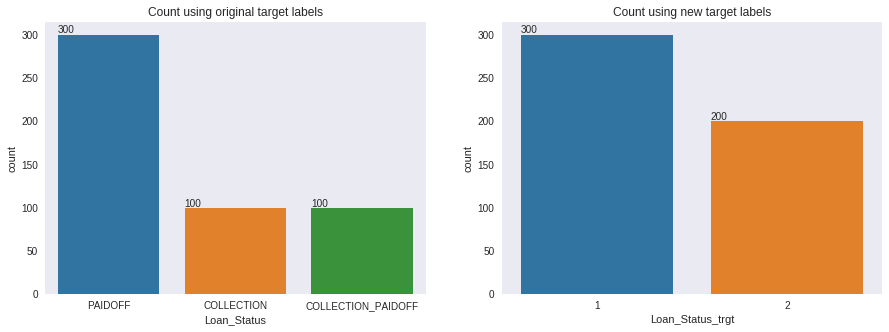

In [77]:
status_map = {"PAIDOFF": 1, "COLLECTION": 2, "COLLECTION_PAIDOFF": 2 }
data['Loan_Status_trgt'] = data['Loan_Status'].map(status_map)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Loan_Status', data=data, ax=axs[0])
axs[0].set_title("Count using original target labels")
for t in axs[0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[0].annotate('', (t.get_x(), 0))
    else:
        axs[0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

sns.countplot(x='Loan_Status_trgt', data=data, ax=axs[1])
axs[1].set_title("Count using new target labels")
for t in axs[1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1].annotate('', (t.get_x(), 0))
    else:
        axs[1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [0]:
dummies = pd.get_dummies(data['education']).rename(columns=lambda x: 'is_' + str(x))
data = pd.concat([data, dummies], axis=1)
data = data.drop(['education'],  axis=1)

dummies = pd.get_dummies(data['Gender']).rename(columns=lambda x: 'is_' + str(x))
data = pd.concat([data, dummies], axis=1)
data = data.drop(['Gender'], axis=1)

#data = data.drop(['Loan_ID', 'Loan_Status', 'effective_date', 'due_date', 'paid_off_time', 'past_due_days', 'paid_off_date', 'day_to_pay'], axis=1)

In [0]:
X = data.drop(['Loan_Status_trgt'], axis=1)
y = data.Loan_Status_trgt

In [0]:
# ML library

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### Create function to evaluate the score of each classification model
def eval_model_classifier(model, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    model.fit(trainX, trainY)    
    return model.score(testX,testY)

In [87]:
### 1st round: RandomForestClassification

# Initialise values
num_estimators_array = np.array([1,5,10,50,100,200,500]) 
num_smpl = 5 # Test run the model according to samples_number
num_grid = len(num_estimators_array)
score_array_mu = np.zeros(num_grid) # Keep mean
score_array_sigma = np.zeros(num_grid) # Keep Standard deviation 
j=0

print("{}: RandomForestClassification Starts!")
for n_estimators in num_estimators_array:
    score_array = np.zeros(num_smpl) # Initialize
    for i in range(0,num_smpl):
        rf_class = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        score_array[i] = eval_model_classifier(rf_class, X, y, 0.8)
        print("{}: Try {} with n_estimators = {} and score = {}".format(now(), i, n_estimators, score_array[i]))
    score_array_mu[j], score_array_sigma[j] = np.mean(score_array), np.std(score_array)
    j=j+1

print("{}: RandomForestClassification Done!")

{}: RandomForestClassification Starts!


ValueError: ignored